In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/phoor/Downloads/converted.csv")


In [4]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [6]:
df = df.drop([ 'Unnamed: 0'], axis=1)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [8]:
df=df.dropna(subset=['artists','album_name','track_name'])

In [9]:
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

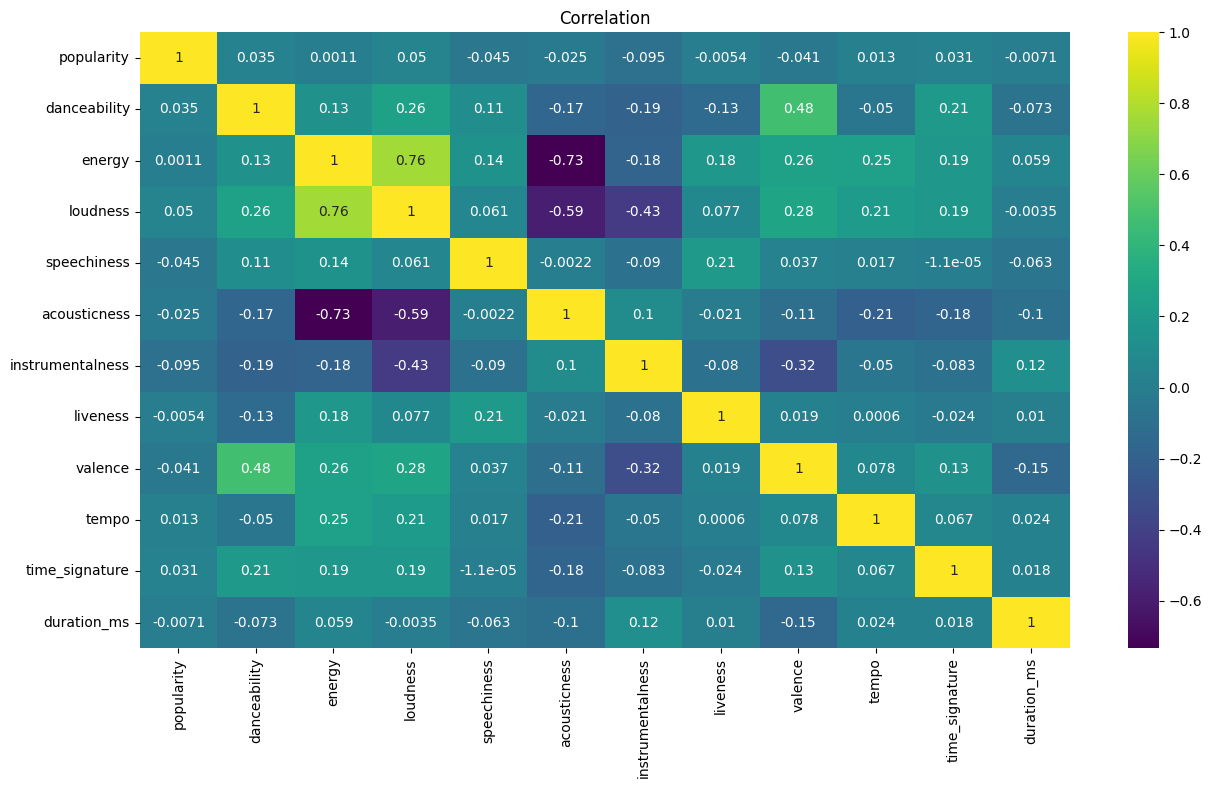

In [10]:
plt.figure(figsize=(15,8))
heat=df[['popularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','duration_ms']].corr(method='pearson')
sns.heatmap(heat,annot=True,cmap='viridis')
plt.title('Correlation')
plt.show()

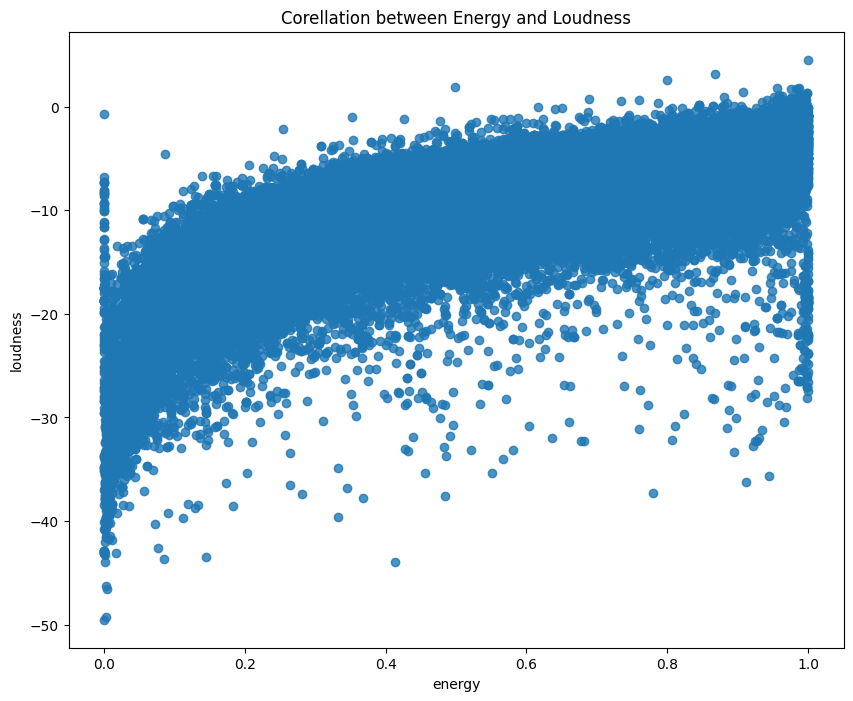

In [11]:
sample=df.head(6500)
plt.figure(figsize=(10,8))

sns.regplot(data=df,x='energy',y='loudness').set_title('Corellation between Energy and Loudness')
plt.show()

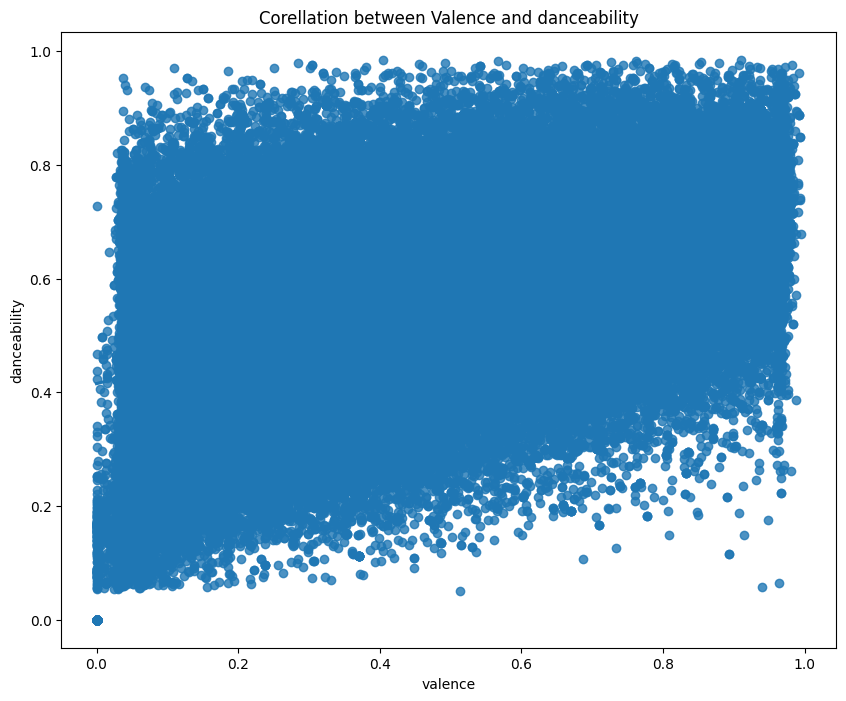

In [12]:
plt.figure(figsize=(10,8))
sns.regplot(data=df,x='valence',y='danceability').set_title("Corellation between Valence and danceability")
plt.show()

In [13]:
X = df[['duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
y = df['popularity']

In [14]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [15]:
df['duration_seconds']=df['duration_ms']/1000 #Converting the duration in milliseconds to seconds

In [16]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_seconds
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,230.666
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,149.610
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,210.826
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,201.933
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,198.853


In [17]:
columns_to_check = ['danceability', 'energy', 'acousticness', 'valence']
for column in columns_to_check:
    invalid_values = df[(df[column] < 0) | (df[column] > 1)]
    if not invalid_values.empty:
        print(f"Invalid values in '{column}':")
        print(invalid_values)
        df.loc[(df[column] < 0) | (df[column] > 1), column] = None

print(df) # assign None to the columns where the values are between 0 and 1


                      track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...  

In [18]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_seconds
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034,228.031153
std,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623,107.296058
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.586000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000,174.066000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,212.906000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000,261.506000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,5237.295000


To Chect the outliers between Loudness and Tempo

C:\Users\phoor\AppData\Local\Temp\ipykernel_20812\1721389558.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[0,1], a=df['loudness'])
C:\Users\phoor\AppData\Local\Temp\ipykernel_20812\1721389558.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[1,1], a=df['tempo'])


Text(0.5, 1.0, 'Tempo - Skewness')

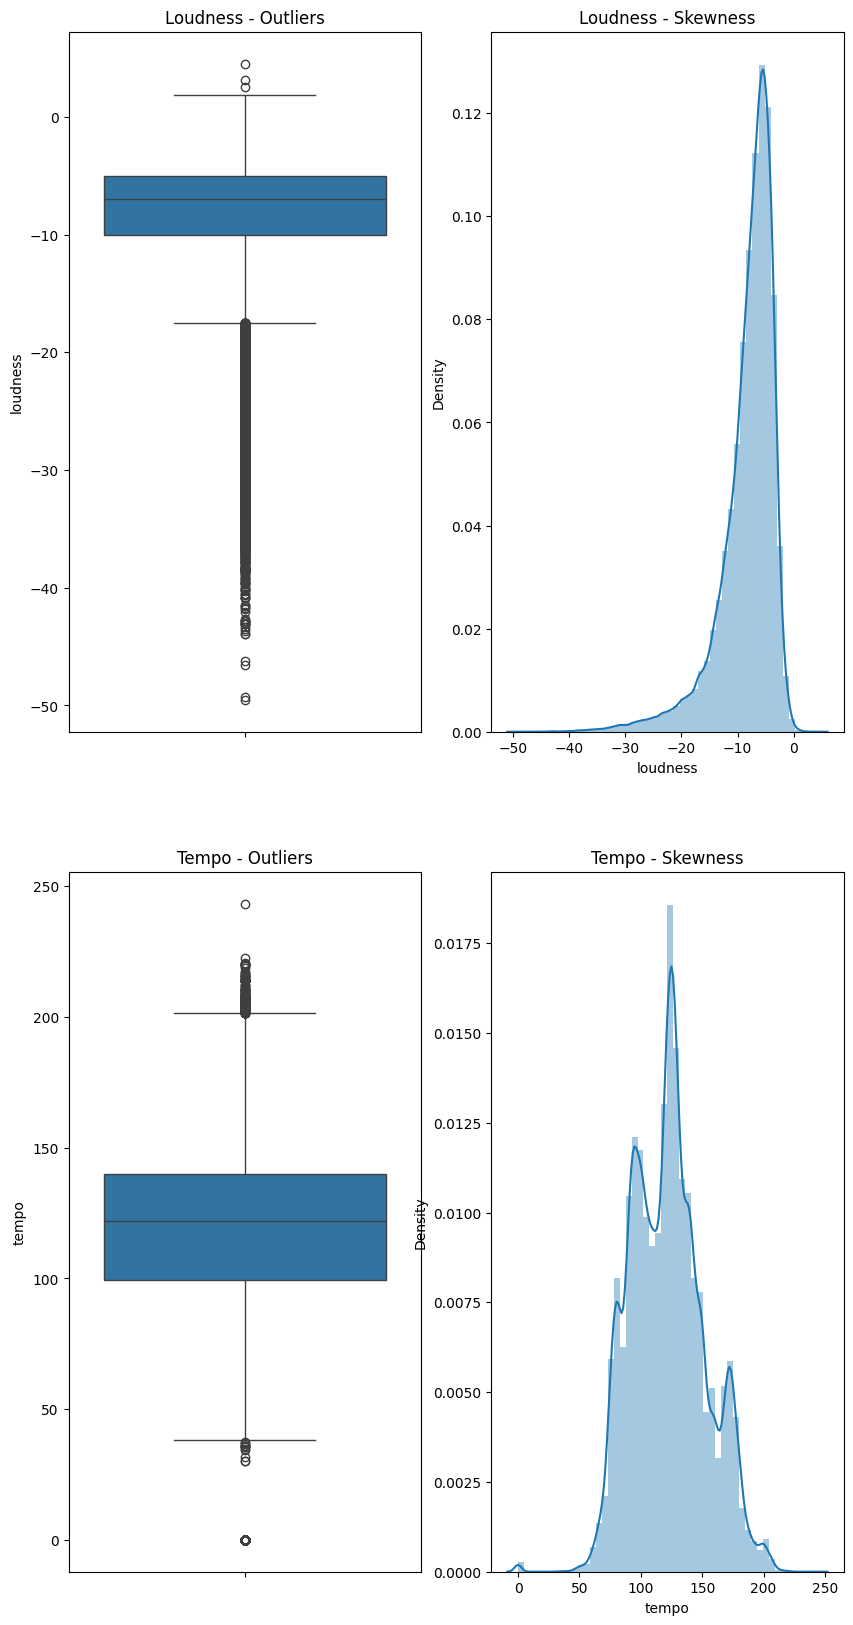

In [19]:

fig,axes = plt.subplots(2,2, figsize=(10,20))

# Loudness
sns.boxplot(ax=axes[0,0], data = df['loudness'])
axes[0,0].set_title('Loudness - Outliers')
sns.distplot(ax=axes[0,1], a=df['loudness'])
axes[0,1].set_title('Loudness - Skewness')

# Tempo
sns.boxplot(ax=axes[1,0], data=df['tempo'])
axes[1,0].set_title('Tempo - Outliers')
sns.distplot(ax=axes[1,1], a=df['tempo'])
axes[1,1].set_title('Tempo - Skewness')


In [20]:
#Predicting the outliers for the loudness column
Q1=df['loudness'].quantile(0.25)
Q3=df['loudness'].quantile(0.85)
IQR=Q3-Q1
# Defining lower bounds and upper bounds
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df['loudness']=df['loudness'][(df['loudness']>=lower_bound)&(df['loudness']<=upper_bound)]

In [21]:
#Predicting the outliers for the tempo column
Q1=df['tempo'].quantile(0.25)
Q3=df['tempo'].quantile(0.85)
IQR=Q3-Q1
#Defining lower bounds and the upper bounds
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df['tempo']=df['tempo'][(df['tempo']>=lower_bound)&(df['tempo']<=upper_bound)]

C:\Users\phoor\AppData\Local\Temp\ipykernel_20812\1606962858.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[0,1], a=df['loudness'])
C:\Users\phoor\AppData\Local\Temp\ipykernel_20812\1606962858.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[1,1], a=df['tempo'])


Text(0.5, 1.0, 'Tempo - Skewness')

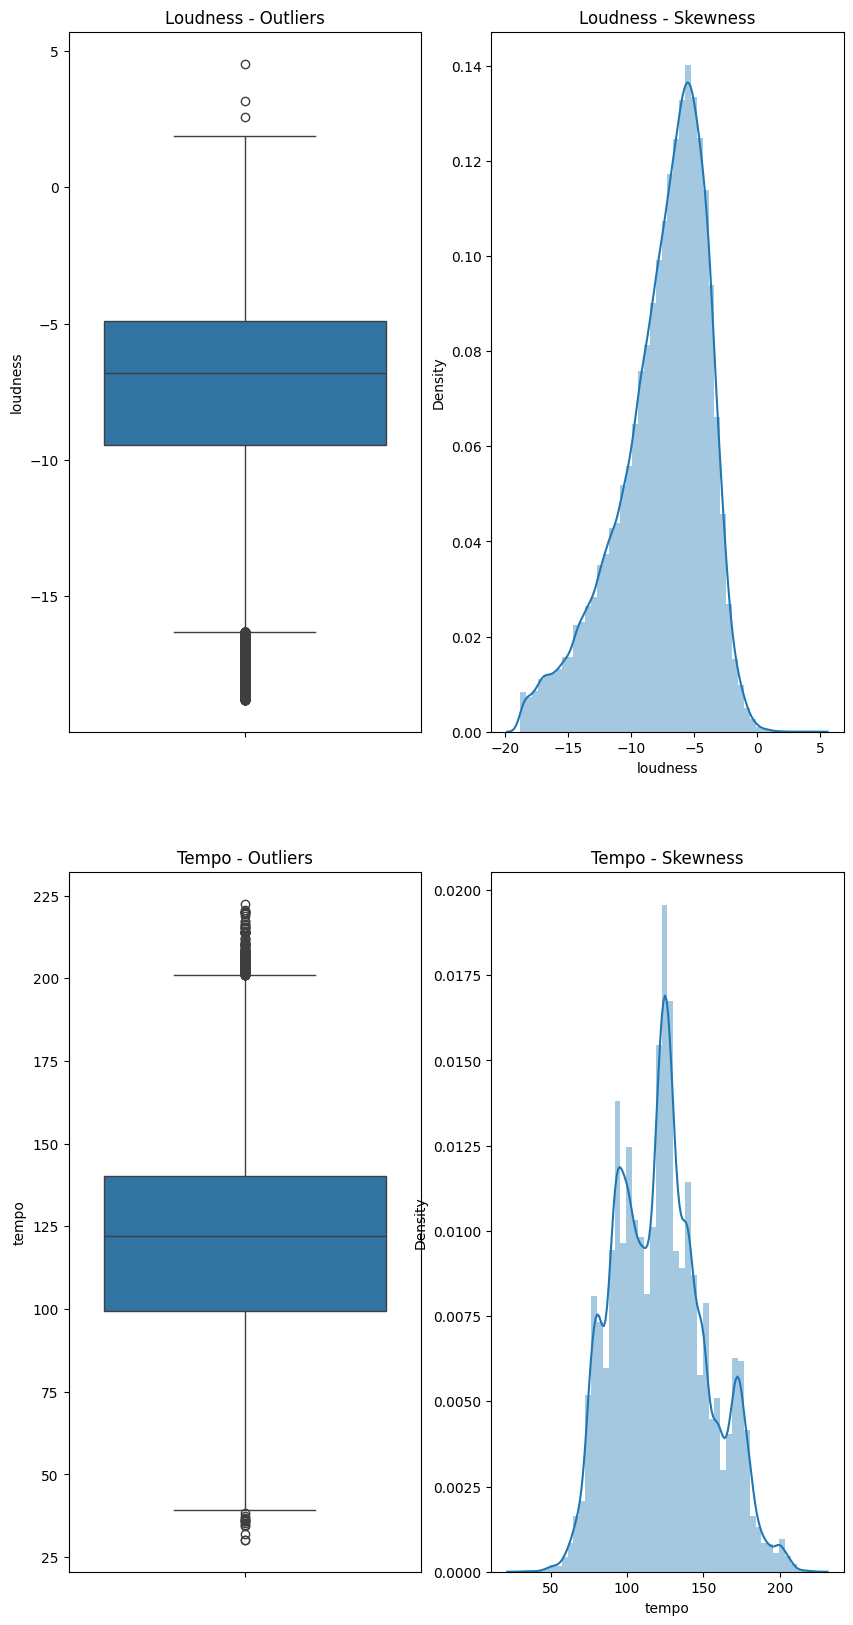

In [22]:
fig,axes = plt.subplots(2,2, figsize=(10,20))

# Loudness
sns.boxplot(ax=axes[0,0], data = df['loudness'])
axes[0,0].set_title('Loudness - Outliers')
sns.distplot(ax=axes[0,1], a=df['loudness'])
axes[0,1].set_title('Loudness - Skewness')

# Tempo
sns.boxplot(ax=axes[1,0], data=df['tempo'])
axes[1,0].set_title('Tempo - Outliers')
sns.distplot(ax=axes[1,1], a=df['tempo'])
axes[1,1].set_title('Tempo - Skewness')

In [23]:
df['loudness'].fillna(df['loudness'].mean(),inplace=True)
df['tempo'].fillna(df['tempo'].mean(),inplace=True)

In [24]:
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration_seconds    0
dtype: int64

In [25]:
df['popularity'].describe()

count    113999.000000
mean         33.238827
std          22.304959
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

In [26]:
df['popularity'].median()

35.0

In [27]:
df['popularity'].mode()

0    0
Name: popularity, dtype: int64

In [28]:
ndf=df.copy()

In [29]:
ndf.loc[ndf['popularity']<50,'popularity']=0 # asssigning 0 for the songs of popularity below 50
ndf.loc[ndf['popularity']>=50,'popularity']=1 # assigning 1 for the songs of popularity above 50
ndf.loc[ndf['popularity']==1]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_seconds
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,1,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,230.666
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,1,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,149.610
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,1,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,210.826
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,1,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,201.933
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,1,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,198.853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113872,7xzMrUmlooPa1Fmp88hlYc,Cesária Evora,Miss Perfumado,Sodade,1,293640,False,0.575,0.4300,8,...,1,0.0363,0.8220,0.000661,0.1150,0.427,82.691,4,world-music,293.640
113883,0mhKPUIHNEz4tuWNxNEqCS,Bethel Music;Paul McClure;Hannah McClure,Homecoming (Live),I Belong To Jesus - Live,1,519770,False,0.462,0.6130,9,...,1,0.0328,0.2540,0.000077,0.1240,0.259,133.851,4,world-music,519.770
113929,18q8W11QNDEfhYIxwypTQK,Rend Collective,Campfire II: Simplicity,Oceans (Where Feet May FaiI),1,283066,False,0.533,0.7680,9,...,1,0.0542,0.1630,0.000000,0.0847,0.396,140.005,4,world-music,283.066
113950,4JDmqxJrJS9FoMPzWmILkQ,Shane & Shane,"Psalms, Vol. 2",Psalm 34 (Taste and See),1,326652,False,0.557,0.3930,2,...,1,0.0331,0.1100,0.000000,0.3800,0.238,114.048,4,world-music,326.652


In [30]:
ndf['popularity'].value_counts()

popularity
0    84632
1    29367
Name: count, dtype: int64

In [31]:
ndf

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_seconds
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,1,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,230.666
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,1,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,149.610
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,1,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,210.826
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,1,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,201.933
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,1,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,198.853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,0,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,384.999
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,0,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,385.000
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,0,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,271.466
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,0,283893,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,283.893


Lable Encoding the Explicit Column

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ndf['explicit']=le.fit_transform(ndf['explicit'].astype(str))

In [33]:
ndf

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_seconds
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,1,230666,0,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,230.666
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,1,149610,0,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,149.610
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,1,210826,0,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,210.826
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,1,201933,0,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,201.933
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,1,198853,0,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,198.853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,0,384999,0,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,384.999
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,0,385000,0,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,385.000
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,0,271466,0,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,271.466
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,0,283893,0,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,283.893


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [35]:
X=ndf[['duration_seconds', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
y=ndf['popularity']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=29)

#Standard Scaler
Scaler=StandardScaler()
x_train_scaled=Scaler.fit_transform(X_train)
x_test_scaled=Scaler.transform(X_test)

#We use standard Scaler to reduce the mean to 0 and a standared deviation of 1. This is done to columns with high values from dominating the other columns with lower values


In [37]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


os=RandomOverSampler()
X_train_resampled,y_train_resample=os.fit_resample(x_train_scaled,y_train)
print(f"Result before oversampling:",Counter(y_train))
print(f"Result after oversampling:",Counter(y_train_resample))


Result before oversampling: Counter({0: 67704, 1: 23495})
Result after oversampling: Counter({0: 67704, 1: 67704})


In [38]:
models=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier()]
for model in models:
    model.fit(X_train_resampled,y_train_resample)
    train_pred=model.predict(X_train_resampled)
    test_pred=model.predict(x_test_scaled)
    acc_train=accuracy_score(y_train_resample,train_pred)
    acc_test=accuracy_score(y_test,test_pred)
    conf_train=confusion_matrix(y_train_resample,train_pred)
    conf_test=accuracy_score(y_test,test_pred)

    print(f"*************training{model}****************")
    print(f"Train Accuracy score:{acc_train}")
    print(f"Confusion_matrix Score:{conf_train}")
    print(f"#############testing{model}##############")
    print(f"Test Accuracy score:{acc_test}")
    print(f"conf_matrix score:{conf_test}")

*************trainingLogisticRegression()****************
Train Accuracy score:0.5909621292685808
Confusion_matrix Score:[[37856 29848]
 [25539 42165]]
#############testingLogisticRegression()##############
Test Accuracy score:0.5727631578947369
conf_matrix score:0.5727631578947369
*************trainingDecisionTreeClassifier()****************
Train Accuracy score:0.99170654614203
Confusion_matrix Score:[[67146   558]
 [  565 67139]]
#############testingDecisionTreeClassifier()##############
Test Accuracy score:0.7805263157894737
conf_matrix score:0.7805263157894737
*************trainingRandomForestClassifier()****************
Train Accuracy score:0.9916991610539998
Confusion_matrix Score:[[67110   594]
 [  530 67174]]
#############testingRandomForestClassifier()##############
Test Accuracy score:0.8441228070175438
conf_matrix score:0.8441228070175438
*************trainingGradientBoostingClassifier()****************
Train Accuracy score:0.6329241994564575
Confusion_matrix Score:[[38387 

Hyper parameter Tuning

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
               
                'max_features': ['log2'], # max features considers mostly every values to find the best spilt in the random forest
                'max_depth': [3,6,9], #max_depth avoids overfitting
                'max_leaf_nodes': [3, 6, 9], #to find the max number of leaf nodes
            } 
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=3, max_features='log2', max_leaf_nodes=3)


In [42]:
best_model_classifier=grid_search.best_estimator_

In [43]:
best_model_classifier

RandomForestClassifier(max_depth=3, max_features='log2', max_leaf_nodes=3)

In [44]:
best_model_classifier.fit(X_train_resampled,y_train_resample)
trn_pred=best_model_classifier.predict(X_train_resampled)
tst_pred=best_model_classifier.predict(x_test_scaled)

In [45]:
import pickle
with open('ClassifierModel.pkl', 'wb') as file:
    pickle.dump(best_model_classifier, file)

with open('StandardScaler.pkl','wb') as files:
    pickle.dump(Scaler,files)